# BSc Apprenticeship Degree in Digital Technology & Solutions
#### Author
Zach Molony
#### Module Name                  
Data Structure & Algorithms
#### Objectives
- Empirical analysis of sorting algorithms using Big-O notation.
- Empirical analysis of search algorithms using Big-O notation.
- Design of recursive method for problem solving.

In [1]:
# Imports
%matplotlib inline

from random import sample, randint
import timeit
from functools import partial as wrapper
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import csv

## PART I: Empirical Analysis of Sorting Algorithms (50%)
### Algorithm code

In [14]:
# Bubble sort
def bubble(arr):
    n = len(arr)
    for i in range(n):
        for x in range(1, n):
            if arr[x] < arr[x-1]:
                arr[x], arr[x-1] = arr[x-1], arr[x]
    return arr

# Insertion sort
def insertion(arr):
    for i in range(1, len(arr)): 
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
                arr[j+1] = arr[j] 
                j -= 1
        arr[j+1] = key
    return arr


# Selection sort
def selection(arr):  
    for i in range(len(arr)): 
        min_idx = i 
        for j in range(i + 1, len(arr)): 
            if arr[min_idx] > arr[j]: 
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i] 
    return arr                                          

# Merge sort
def merge(arr):
    if len(arr) > 1: 
        mid = len(arr) // 2
        leftArr = arr[:mid]
        rightArr = arr[mid:]
        merge(leftArr)
        merge(rightArr)
        i = j = k = 0
        while i < len(leftArr) and j < len(rightArr): 
            if leftArr[i] < rightArr[j]: 
                arr[k] = leftArr[i] 
                i += 1
            else: 
                arr[k] = rightArr[j] 
                j += 1
            k += 1
        while i < len(leftArr): 
            arr[k] = leftArr[i] 
            i += 1
            k += 1
        while j < len(rightArr): 
            arr[k] = rightArr[j] 
            j += 1
            k += 1
    return arr

# Shell sort
def shell(arr):
    n = len(arr) 
    gap = n // 2
    while gap > 0: 
        for i in range(gap,n):
            temp = arr[i]
            j = i 
            while  j >= gap and arr[j-gap] > temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
            arr[j] = temp 
        gap //= 2
    return arr

In [2]:
# Define constants (master object for all timings / list sizes / lists to be generated)
master = {}
inputSizes = [1000, 5000, 10000, 25000, 50000, 75000, 100000]
# Bigger lists for the more efficient algorithms
inputSizesBigger = [1000, 5000, 10000, 25000, 50000, 100000, 500000, 1000000, 5000000, 10000000]

#Objects to hold actual arrays
randomLists = {}
randomListsBigger = {}

In [3]:
# Create lists of random numbers using random.sample
for size in inputSizes:
    randomLists[str(size)] = sample(range(0, size+1), size)

for size in inputSizesBigger:
    randomListsBigger[str(size)] = sample(range(0, size+1), size)

### Timing function
Here I am measuring the timing of the algorithms using the timeit.Timer() function. This measures actual wall time and therefore it must be acknowledged that all measurements have been tested on the same system under the same conditions:
- Tested on an Intel(R) Core(TM) i5-4690K CPU OC @ 4.0GHz.

This function takes one parameter, which is the number of times the program is run for it to take an average from: ```t.timeit(n)```. Where ```n``` is the amount repetitions averaged. I am running each function 3 times as this will give me an accurate average while not taking a day. üòâ

I am using the ```wrapper``` function to insert the array into the function - this is an issue with the timer function.

**Some notes:** Sadly, I couldn't work out how to create a single function which could run the below code on all the functions, this was due to the timer I chose not allowing multiple functions with parameters to be passed in. I decided to stay with this implementation as it still is accurate and effective, although the below section of the code needs to be repeated for each algorithm.

Alternately, this could have been measured in operations, adding one to a counter each time a comparison was made. I unfortunately did not have time to implement this additionally however I may add a proof of concept at the end of this section. 

In [ ]:
# Init object to record times
times = {}

# For every size, create a timer 
for size in randomLists:
    t = timeit.Timer(wrapper(bubble, randomLists[size]))
    times[size] = round(t.timeit(3), 6)
    
# Add to master object
master['bubble'] = times

In [ ]:
times = {}
for size in randomLists:
    t = timeit.Timer(wrapper(selection, randomLists[size]))
    times[size] = round(t.timeit(3), 6)
master['selection'] = times

In [ ]:
times = {}
for size in randomLists:
    t = timeit.Timer(wrapper(insertion, randomLists[size]))
    times[size] = round(t.timeit(3), 6)
master['insertion'] = times

In [ ]:
times = {}
for size in randomListsBigger:
    t = timeit.Timer(wrapper(merge, randomListsBigger[size]))
    times[size] = round(t.timeit(3), 6)
master['merge'] = times

In [ ]:
times = {}
for size in randomListsBigger:
    t = timeit.Timer(wrapper(shell, randomListsBigger[size]))
    times[size] = round(t.timeit(3), 6)
master['shell'] = times

### Write to CSV file
Create a backup of the timings external the the projects. All variables in this notebook are volatile so if I return after closing it I will need to rerun the lengthy timing functions.

In [ ]:
# Write to CSV


with open('timings2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for obj in master:
        writer.writerow([obj] + [time for time in master[obj].values()])

# Analysis
Now you have seen how the measurements have been generated and stored, in this section I will begin my analysis on the time complexity of the sorting algorithms. Below I am reading the times from the file I have previously made for the reasons explained previously.

In [4]:
readMaster = {} #create a new, constant master as the variables in this notebook are volatile 
with open('bigtimings.csv') as timings:
    readCSV = csv.reader(timings, delimiter=',')
    for row in readCSV:
        readMaster[row[0]] = row[1:]

## Bubble Sort
Bubble sort works by iterating through a list of numbers, and then for each number, comparing it with subsequent numbers until it is in the correct place. Clearly as each number in the list is compared with each other number in the list, the time complexity will be $\mathcal{O}(n^{2})$.

Let us manually calculate the time complexity in a line by line analysis:

In [ ]:
def bubble(arr):                                      # Operations | Subtotal | Total
    n = len(arr)                                      # 1 + 1       = 1  
    for i in range(n):                                # n + 1 + 1   = n
        for x in range(1, n):                         # n + 1 + 1   = n  
            if arr[x] < arr[x-1]:                     # 1 + 1       = 1
                arr[x], arr[x-1] = arr[x-1], arr[x]   # 1 + 1 + 1   = 1
                                                      #----------------------------
                                                      # Total       = n * n    = n^2

This implementation of bubble sort has a complexity of $–û(n^{2})$, where n is the number of items being sorted. This is the worst class of time complexity out of the algorithms in this report. The expected time complexity of a standard sorting algorithm should be around $\mathcal{O}(n log n)$, furthermore, of the other $–û(n^{2})$ sorting algorithms bubble is by far the slowest, as we can see from the graph below, illustrating extremely high operation time counts.

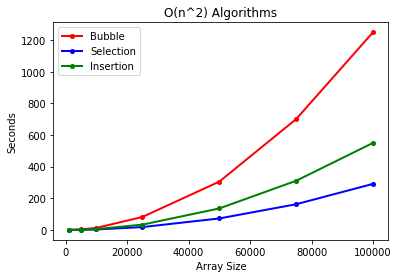

In [5]:
x = inputSizes
bub = [float(t) for t in readMaster['bubble']]
sel = [float(t) for t in readMaster['selection']]
ins = [float(t) for t in readMaster['insertion']]

plt.plot(x, bub, color='red', label="Bubble", linewidth = 2, marker='o', markersize=4) 
plt.plot(x, sel, color='blue', label="Selection", linewidth = 2, marker='o', markersize=4) 
plt.plot(x, ins, color='green', label="Insertion", linewidth = 2, marker='o', markersize=4) 
plt.xlabel('Array Size') 
plt.ylabel('Seconds') 
plt.title('O(n^2) Algorithms')
plt.legend()
plt.show() 

### Performance factors
The below graph shows the timing map of bubble sort clearly as a quadratic function, so therefore the time complexity can be interpreted as $\mathcal{O}(n^{2})$.

The performance of bubble sort is determined by the distance and the direction which elements of the list need to move. Elements in the list move at different speeds - take for example a low number, at the end of a long array. This element can only move once per pass, meaning it will take $n - 1$ passes for the element to be in place. On the other hand, a larger element at the start of the list will win all the swaps and will move very quickly to the end of the list. This means that bubble sort will be extremely slow at sorting a reverse list.  

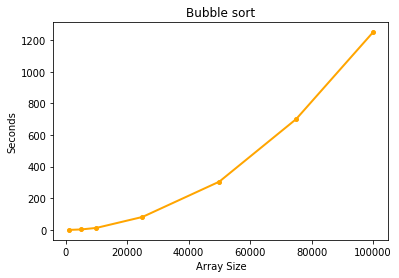

In [6]:
x = inputSizes
y = [float(t) for t in readMaster['bubble']]

# plotting the points  
plt.plot(x, y, color='orange', linewidth = 2, marker='o', markersize=4) 

# naming the x axis 
plt.xlabel('Array Size') 
# naming the y axis 
plt.ylabel('Seconds') 
  
# giving a title to my graph 
plt.title('Bubble sort') 
  
# function to show the plot 
plt.show() 

### Optimisations

We can clearly see that bubble sort struggles with large data sets, so perhaps we can optimise this somehow. See the below implementation. This iteration includes a flag, which improves the performance slightly: for an already sorted list, the array is still $\mathcal{O}(n^{2})$ dispite no swaps being made. With this fix, the performance is now $\mathcal{O}(n)$ in the best case Scenario, as the array will complete one iteration of the inner loop and break.

In [7]:
# Bubble sort
def bubble(arr): 
    n = len(arr) 
    # iterate through the the array
    for i in range(n): 
        swapped = False # create a flag to check if a swap has occurred
        for j in range(0, n-i-1): # final i elements will already be in place so no need to check them
            # perform a swap if the elements are out of order
            if arr[j] > arr[j+1]: 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
                swapped = True
        if swapped == False: # there is no need to keep iterating as the array is in order
            break
    return arr

In conclusion, this modification improves the best case time to $\mathcal{O}(n)$, and slightly improves the runtime of the overall algorithm and thereby the average case, although still remains at $\mathcal{O}(n^{2})$. This in some ways is better than much more complex algorithms as they can sometimes be slower for a fully sorted list. Still though, even with this improvement, another $\mathcal{O}(n^{2})$ algorithm such as insertion sort is far superior as it shares this best case, it is still much faster in it's average time, as depicted by the graph previously mentioned.

## Selection Sort
Selection sort is another extremely simple sorting algorithm which runs two counters simultaneously, effectively splitting the array into two subarrays one which is sorted, and one of the remaining unsorted elements. This however, holds a minumum index for the proportion of the array which is sorted rather than creating a new list. This means that this array has an auxiliary  space complexity of $\mathcal{O}(n)$. 

However, when the algorithm calculates the minimun index, this requires comparing the first element and comparing with $n-1$ other elements. The next lowest element is found the same way with the next element compared with the remaining $n-2$ and so on. This, however, does not mathematically equate to $\mathcal{O}(nlogn)$ dispite the input size decreasing. See this proof:

$\sum\limits_{i=1}^{n-1} i = (n-1) + (n-2) + ... + 1$

Through arithmetic progression and reduction this becomes $\frac{1}{2}(n^{2}-n)$:

$\sum\limits_{i=1}^{n-1} i = \frac{(n+1)+1}{2} = \frac{1}{2}n(n-1) = \frac{1}{2}(n^{2}-n)$

When we convert this to Big O notation we remove the coefficients and drop lower order terms. This leaves us with:

$\frac{1}{2}(n^{2}-n) = \mathcal{O}(n^{2})$

[Source](https://en.wikipedia.org/wiki/Selection_sort#Complexity)

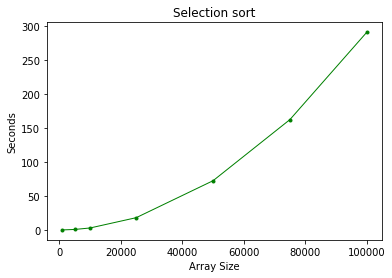

In [8]:
x = inputSizes
y = [float(t) for t in readMaster['selection']]

plt.plot(x, y, color='green', linewidth = 1, marker='o',markersize=3) 
plt.xlabel('Array Size')
plt.ylabel('Seconds') 
plt.title('Selection sort')
plt.show() 

The above graph clearly shows us the shape of a quadratic curve, so it can be interpreted that the time taken for this algorithm to calculate the time taken is proportional to the square of the size of the data set. Let us conduct a heuristic line by line analysis of our implementation:

In [ ]:
def selection(arr):                                  # Operations | Subtotal | Total
    for i in range(len(arr)):                        # n + 1 + 1  = n
        min_idx = i                                  # 1          = 1
        for j in range(i + 1, len(arr)):             # n + 1 + 1  = n
            if arr[min_idx] > arr[j]:                # 1 + 1 + 1  = 1
                min_idx = j                          # 1          = 1
        arr[i], arr[min_idx] = arr[min_idx], arr[i]  # 1 + 1 + 1  = 1 
    return arr                                       #----------------------------
                                                     # Total       = n * n    = n^2 

### Performance & Comparison
Clearly this function is another $\mathcal{O}(n^{2})$, as pointed to by our graph, mathematical and heuristic analysis - however - this is  much faster than bubble sort, although much slower than insertion sort, as shown by the below graph. 

This can be easily understood by looking at the similarities of the insertion and selection. For example, when at the $k$th element in an array, in both algorithms will be in sorted order up to that point. The performance difference is that in insertion, only the amount needed to correctly place the algorithm is needed. Selection will read the rest of the elements before working out the correct place. [Source](https://en.wikipedia.org/wiki/Selection_sort#Comparison)

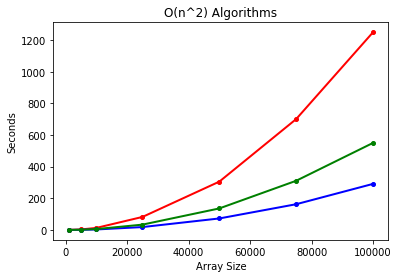

In [9]:
x = inputSizes
bub = [float(t) for t in readMaster['bubble']]
sel = [float(t) for t in readMaster['selection']]
ins = [float(t) for t in readMaster['insertion']]

plt.plot(x, bub, color='red', label="Bubble", linewidth = 2, marker='o', markersize=4) 
plt.plot(x, sel, color='blue',label="Selection", linewidth = 2, marker='o', markersize=4) 
plt.plot(x, ins, color='green',label="Insertion", linewidth = 2, marker='o', markersize=4) 
plt.xlabel('Array Size') 
plt.ylabel('Seconds') 
plt.title('O(n^2) Algorithms')
plt.show() 

## Insertion Sort
Insertion sort is a sorting algorithm where a sorted array is built up one item at a time. The algorithm traverses the array and bubbles down each element to its correct place. As the list is traversed, and for each item the previous items are traversed, this means that for $n$ elements the previous $(n-1) + (n-2) + ... + 1$ are traversed, extremely similarly to the Selection sort we looked at. We know that this equates to $\mathcal{O}(n^{2})$.

Let's complete a line by line analysis of operations:

In [ ]:
def insertion(arr):                     # Operations | Subtotal | Total
    for i in range(1, len(arr)):        # n + 1      = n
        key = arr[i]                    # 1 + 1      = 1
        j = i - 1                       # 1 + 1      = 1
        while j >= 0 and key < arr[j]:  # n + 1 + 1  = n
                arr[j+1] = arr[j]       # 1 + 1      = 1
                j -= 1                  # 1          = 1
        arr[j+1] = key                  # 1 + 1      = 1
    return arr                          #----------------------------
                                        # Total       = n * n    = n^2 

From the line by line analysis it can be seen that the total operations completed would be $\mathcal{O}(n^{2})$.

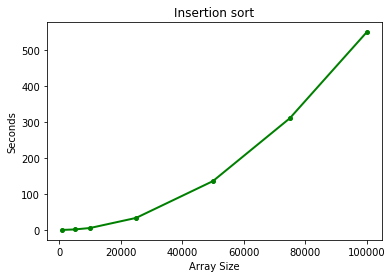

In [10]:
x = np.array(inputSizes)
y = np.array([float(t) for t in readMaster['insertion']])

plt.plot(x, y, color='green', linewidth = 2, marker='o', markersize=4)
plt.xlabel('Array Size')
plt.ylabel('Seconds') 
plt.title('Insertion sort')
plt.show() 

As you can see the graph above clearly shows that the trend of the curve increases in a quadratic fashion. This graph states that the results represent a time complexity of $\mathcal{O}(n^{2})$

### Almost-sorted data
In this section I will investigate if insertion sort has a time complexity of $\mathcal{O}(n)$ for almost sorted data, say 6 to 7% unsorted. 

In [11]:
almostSorted = {}
for size in inputSizes:
    array = sample(range(0, size+1), size)
    array.sort()
    elementcount = size * 0.06
    randomnums = sample(range(0, int(size)+1), int(elementcount)) #make list of random numbers 6% size of the target array 
    for x in range(int(elementcount)):
        randomIndex = randint(0,len(array)-1)
        array[randomIndex] = randomnums[x]
    almostSorted[str(size)] = array

In [21]:
almostSortedTimes = {}
for size in almostSorted:
    t = timeit.Timer(wrapper(insertion, almostSorted[size]))
    almostSortedTimes[size] = round(t.timeit(3), 6)

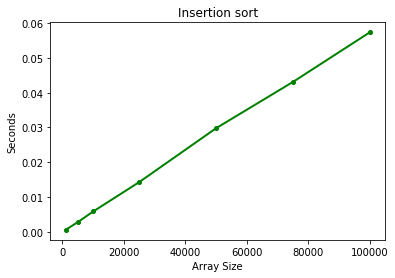

In [20]:
x = inputSizes
y = [float(t) for t in almostSortedTimes.values()]

plt.plot(x, y, color='green', linewidth = 2, marker='o', markersize=4)
plt.xlabel('Array Size')
plt.ylabel('Seconds') 
plt.title('Insertion sort')
plt.show() 

## Merge Sort

Merge sort is a divide and conquer algorithm which recursively sorts smaller arrays and merges them together. The array must be iterated through once - hence $\mathcal{O}(n)$ - but then each of these must be compared $\mathcal{O}(logn)$ times, as the input can only be reduced $logn$ times. 

Merge sort is a divide and conquer algorithm which recursively sorts smaller arrays and merges them. The array must be iterated through once - hence $\mathcal{O}(n)$ - but then each of these must be compared $\mathcal{O}(logn)$ times, as the input can only be reduced $logn$ times. 

Consider the three steps of a divide and conquer algorithm:

- Divide - Calculate the midpoint of each sub-array. $\mathcal{O}(1)$
- Conquer - Recursively sort two subarrays of n/2 elements each $\mathcal{O}(?)$
- Merge - Merges n elements which takes $\mathcal{O}(n)$ time

Steps 1 and 3 reduce to $\mathcal{O}(n)$. For the conquer step, look at the tree below - for each level from top to bottom Level 2 calls merge method on 2 sub-arrays of length $\frac{n}{2}$ each. The complexity here is $2 * (\frac{cn}{2}) = cn$. Level 3 calls merge method on 4 sub-arrays of length $\frac{n}{4}$ each. The complexity here is $4 * (\frac{cn}{4}) = cn$ and so on ...

Now, the height of this tree is (logn + 1) for a given n. Thereby the overall complexity is $(n)*(logn + 1)*(cn)$, which reduces to $\mathcal{O}(nlogn)$.

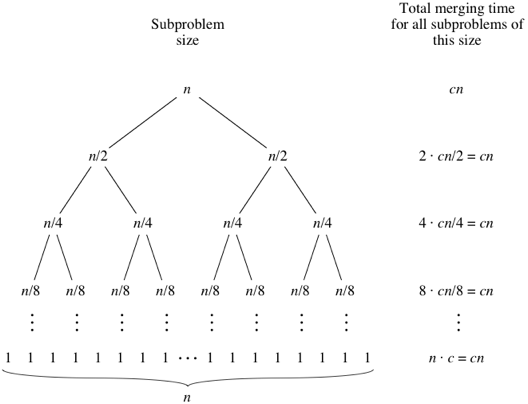

[Image Source](https://www.khanacademy.org/computing/computer-science/algorithms/merge-sort/a/analysis-of-merge-sort)

[Source](https://softwareengineering.stackexchange.com/questions/297160/why-is-mergesort-olog-n)

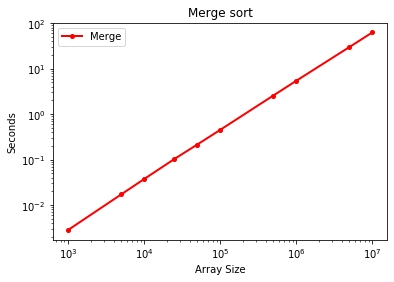

In [22]:
x = inputSizesBigger
y = [float(t) for t in readMaster['merge']]

plt.plot(x, y, color='red', label="Merge", linewidth = 2, marker='o', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size')
plt.ylabel('Seconds') 
plt.title('Merge sort')
plt.legend()
plt.show() 

Due to the exponential size increases of the array size property the axis has been changed to a logarithmic scale. The graph now shows the shape of an $\mathcal{O}(n)$ scale. This is important as here we have removed the $\mathcal{O}(logn)$ from the scale.

Think of this as balancing an equation, moving the $log_{n}$ function to the other side, leaving us with $n$.

The result of this graph is a linear function, showing that the total time complexity is $\mathcal{O}(nlogn)$.

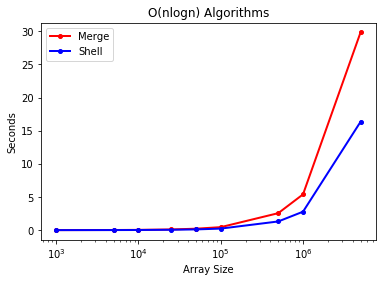

In [23]:
x = inputSizesBigger[:-1]
mer = [float(t) for t in readMaster['merge']][:-1]
she = [float(t) for t in readMaster['shell']][:-1]
# the final measure is commented out as it seems to be an outlier - see the timings.csv for specifics

plt.plot(x, mer, color='red', label="Merge", linewidth = 2, marker='o', markersize=4) 
plt.plot(x, she, color='blue', label= "Shell", linewidth = 2, marker='o', markersize=4)
plt.xlabel('Array Size') 
plt.ylabel('Seconds') 
plt.xscale('log')
plt.title('O(nlogn) Algorithms')
plt.legend()
plt.show() 

However, we can see that merge sort is slower than shell sort, dispite them being the same time complexity. 

## Shell Sort
Shell sort is another divide and conquer algorithm that is largely similar to insertion sort. The algorithm improves on the comparison-sort algorithm as it trys to avoids large shifts as in case of insertion sort, if the smaller value is to the far right and has to be moved to the far left (an issue I discussed earlier as a weakness of bubble sort, can be applied to all comparison sort algorithms). Shell focuses on these elements first before moving to the closer elements. 

[Source](https://www.tutorialspoint.com/data_structures_algorithms/shell_sort_algorithm.htm)

Finding a mathematical proof for the complexity of shell sort is noutoriously complex - see https://en.wikipedia.org/wiki/Shellsort#Computational_complexity

**Please note** - when timing this function, the final measurement i deemed to be an outlier, dispite retesting. This may be due external factors of the timing methodolog, environment/hardware issues, or perhaps an issue with the method of random number generation I chose.

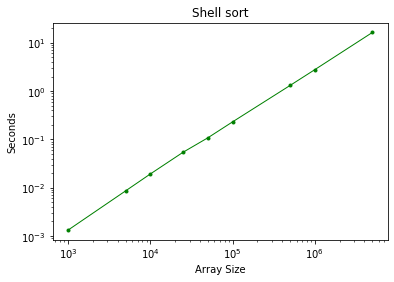

In [24]:
x = inputSizesBigger[:-1]
y = [float(t) for t in readMaster['shell']][:-1]

plt.plot(x, y, color='green', linewidth = 1, marker='o',markersize=3) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Array Size')
plt.ylabel('Seconds') 
plt.title('Shell sort')
plt.show() 

Due to the exponential size increases of the array size property the axis has been changed to a logarithmic scale. The graph now shows the shape of an $\mathcal{O}(n)$ scale. This is important as here we have essentially removed the $\mathcal{O}(logn)$ from the scale. Think of this as of solving an equasion for $n$ - we are moving the $logn$ to the other side and left with $n$. 

The result of this graph is a linear function, showing that the total time complexity is $\mathcal{O}(nlogn)$.

# PART II: Empirical Analysis of Search Algorithms (35%)


## Pseudocode
### Binary Search
Below is the pseudocode for the Binary Search algorithm. Note this is specifically for Python as I am not including any variable assignment as this is not neccessary in python. An implementation for C++ for example would require the variable and a data type to be defined explicitly.
```
FUNCTION binarySearch(array, lowerBound, upperBound, toFind)
    IF upperBound >= lowerBound THEN
        midpoint ‚üµ lowerBound + (upperBound - lowerBound) DIV 2
        IF arr[midpoint] EQUALS toFind THEN
            RETURN midpoint 
        ELIF arr[midpoint] > toFind THEN
            RETURN binarySearch(array, lowerBound, midpoint-1, toFind) 
        ELSE
            RETURN binarySearch(array, midpoint + 1, upperBound, toFind)
        ENDIF
    ELSE
        RETURN -1
    ENDIF
```
### Linear Search
```
FUNCTION linearSearch(array, valueToFind)
    FOR ITEM IN ARRAY
        IF ITEM EQUALS valueToFind THEN
            RETURN ITEM
        ENDIF
    ENDFOR
```

## Implementation

In [25]:
def binarySearch(arr, low, high, toFind, ops): 
    # base case 
    if high >= low:
        ops += 1
        mid = low + (high - low) // 2
        # If element is present at the midpoint
        if arr[mid] == toFind: 
            return [mid, ops]
        # if element is smaller than mid, then it can only be present in left subarray 
        elif arr[mid] > toFind: 
            return binarySearch(arr, low, mid-1, toFind, ops) 
        # else the element can only be present in right subarray 
        else: 
            return binarySearch(arr, mid+1, high, toFind, ops) 
    else: 
        ops += 1
        # element not found 
        return [-1, ops]

def linearSearch(arr, toFind):
    ops = 0
    for i in range(len(arr)):
        ops += 1
        if arr[i] == toFind:
            return [i, ops]
    return [-1, ops]

In [26]:
listSizes = [1000, 5000, 10000, 25000, 50000, 75000, 100000]
sortedArrs = {}
for size in listSizes:
    arr = sample(range(0, size+1), size)
    arr.sort()
    sortedArrs[str(size)] = arr

## Timing
Here we are timing each function 50 times and getting the average, then plotting the results.
### Binary Search

In [42]:
searchMaster = {}
searchTimes = []
for size in sortedArrs:
    tempTimes = []
    for x in range(50):
        numberToGuess = randint(0, len(sortedArrs[str(size)]))
        tempTimes.append(binarySearch(sortedArrs[size], 0, len(sortedArrs[size]), numberToGuess, 0)[1])
    average = sum(tempTimes) / len(tempTimes)
    searchTimes.append(average)
searchMaster['Binary'] = searchTimes

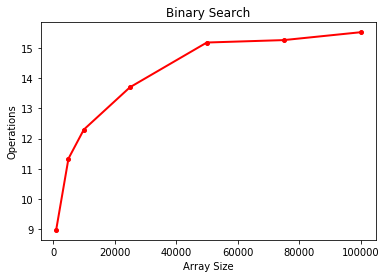

In [43]:
x = listSizes
y = [float(t) for t in searchTimes]

plt.plot(x, y, color='red', label="Binary Search", linewidth = 2, marker='o', markersize=4)
plt.xlabel('Array Size')
plt.ylabel('Operations') 
plt.title('Binary Search')
plt.show() 

The above graph represents a clear $logn$ trend, leading us to believe that this function has a time complexity of $\mathcal{O}(logn)$.

This is because a binary search decreases the amount of space for it to guess from by at least half each time. This means that each time the size of the input doubles, another operation is added. 

Suppose we need at most mmm guesses for an array of length nnn. Then, for an array of length 2n2n2, n, the first guess cuts the reasonable portion of the array down to size nnn, and at most mmm guesses finish up, giving us a total of at most m+1m+1m, plus, 1 guesses.
Let's look at the general case of an array of length nnn. We can express the number of guesses, in the worst case, as "the number of times we can repeatedly halve, starting at nnn, until we get the value 1, plus one." But that's inconvenient to write out.

### Linear Search

In [46]:
searchTimes = []
for size in sortedArrs:
    tempTimes = []
    for x in range(50):
        numberToGuess = randint(0, len(sortedArrs[str(size)]))
        tempTimes.append(linearSearch(sortedArrs[size], numberToGuess)[1])
    average = sum(tempTimes) / len(tempTimes)
    searchTimes.append(average)
searchMaster['Linear'] = searchTimes

In [44]:
# Write to CSV

with open('guessingGame.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for obj in searchMaster:
        writer.writerow([obj] + [time for time in searchMaster[obj]])

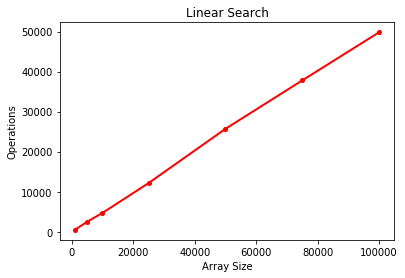

In [47]:
x = listSizes
y = [float(t) for t in searchTimes]

plt.plot(x, y, color='red', label="Linear Search", linewidth = 2, marker='o', markersize=4)
plt.xlabel('Array Size')
plt.ylabel('Operations') 
plt.title('Linear Search')
plt.show() 

# PART III: Empirical Analysis of a Recursive Algorithm (15%)
> ‚ÄúA bunch of motorcycles, cars and vans want to parallel park on a street. The street has n
parking spaces. A motorcycle takes up ONE space, a car takes up TWO spaces, and a van
takes up THREE spaces.‚Äù

To solve this, we need to develop an algorithm which will recursively find all the possibilities of parking. This is done by implementing the base cases of 0, 1 and 2. Then for any other value, continue and repeat for all other possibilities i.e. if a car, bike or van parks in the road.

## Algorithm code

In [49]:
def parkingArrangements(n): 
    if (n == 1 or n == 0): 
        return 1
    elif (n == 2): 
        return 2
    else:
        return parkingArrangements(n - 3) + parkingArrangements(n - 2) + parkingArrangements(n - 1) 

## Testing
As per the given example and some others, the algorithm works.

In [50]:
print(parkingArrangements(4))

7


In [51]:
print(parkingArrangements(7))

44


In [52]:
print(parkingArrangements(8))

81


## Analysis of time complexity
As done before, timing the wall time of the function and plotting the results

In [53]:
times = []
for x in range(20):
    t = timeit.Timer(wrapper(parkingArrangements, x))
    times.append(round(t.timeit(5), 6))

In [55]:
# Write to CSV

with open('recursiveFunction.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(times)

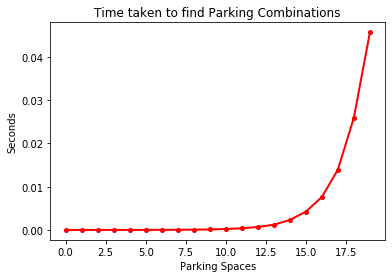

In [54]:
x = [x for x in range(20)]
y = [float(t) for t in times]

plt.plot(x, y, color='red', linewidth = 2, marker='o', markersize=4)
plt.xlabel('Parking Spaces')
plt.ylabel('Seconds') 
plt.title('Time taken to find Parking Combinations')
plt.show() 

This is clearly an exponential function as seen from the graph above. This means that the time complexity would be $\mathcal{O}(n \mathcal{!})$ as the number of possibilities get exponentially larger with the higher the input size. 